In [102]:
import pandas as p
raw_data0 = p.read_csv('E0.csv',header="infer")
raw_data1 = p.read_csv('E1.csv',header="infer")
raw_data2 = p.read_csv('E2.csv',header="infer")
raw_data3 = p.read_csv('E3.csv',header="infer")
raw_data4 = p.read_csv('E4.csv',header="infer")

def parse_data(data):
    try:
        new_data = data[['Date','HomeTeam', 'AwayTeam', 'FTHG', 'FTAG','HST', 'AST']]
        return new_data
    except:
        print("Error")
        
new_data0 = parse_data(raw_data0)
new_data1 = parse_data(raw_data1)
new_data2 = parse_data(raw_data2)
new_data3 = parse_data(raw_data3)
new_data4 = parse_data(raw_data4)

final = p.concat([new_data0, new_data1, new_data2, new_data3, new_data4], axis=0)
difference = final['FTHG']- final['FTAG']
final.insert(7, "Difference", difference, True)

In [104]:
import numpy as np
goals_home={}
goals_away={}
goals_home_goal_diff = {}
goals_away_goal_diff = {}
for i, j in final.iterrows():  
    if j['HomeTeam'] not in goals_home:              #records all goals scored at home
        goals_home[j['HomeTeam']] = [j['FTHG']]
    if j['HomeTeam'] in goals_home:
        goals_home[j['HomeTeam']].append(j['FTHG'])  
    if j['AwayTeam'] not in goals_away:              #records all goals scored away
        goals_away[j['AwayTeam']] = [j['FTAG']]
    if j['AwayTeam'] in goals_away:
        goals_away[j['AwayTeam']].append(j['FTAG'])
           
    if j['HomeTeam'] not in goals_home_goal_diff:    # records the goal difference at home
        goals_home_goal_diff[j['HomeTeam']] = [j['Difference']]
    if j['HomeTeam'] in goals_home_goal_diff:
        goals_home_goal_diff[j['HomeTeam']].append(j['Difference'])
    if j['AwayTeam'] not in goals_away_goal_diff:    #records the goal difference away
        goals_away_goal_diff[j['AwayTeam']] = [j['Difference']]
    if j['AwayTeam'] in goals_away_goal_diff:
        goals_away_goal_diff[j['AwayTeam']].append(j['Difference'])
new_data=[] 
for i,j in final.iterrows():
    temp_lt = []
    temp_lt.append(np.mean(goals_home[j['HomeTeam']]))
    temp_lt.append(np.mean(goals_away[j['AwayTeam']]))
    temp_lt.append(np.mean(goals_home_goal_diff[j['HomeTeam']]))
    temp_lt.append(np.mean(goals_away_goal_diff[j['AwayTeam']]))
    new_data.append(temp_lt)
#AGH = Average goal at home by hometeam
#AGH = Average goal at away by awayteam
#AGdH = Average goal diff at home by hometeam
#AGdH = Average goal diff at away by awayteam
df = p.DataFrame(new_data, columns = ['AGH', 'AGA','AGDH','AGDA']) 
final.insert(8,"AGH",df.AGH,True)
final.insert(9,"AGA",df.AGA,True)
final.insert(10,"AGDH",df.AGDH,True)
final.insert(11,"AGDA",df.AGDA,True)
final

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,Difference,AGH,AGA,AGDH,AGDA
0,09/08/2019,Liverpool,Norwich,4,1,7,5,3,2.397590,0.576923,1.590361,1.461538
1,10/08/2019,West Ham,Man City,0,5,3,9,-5,1.409639,2.060241,-0.108434,-1.168675
2,10/08/2019,Bournemouth,Sheffield United,1,1,3,3,0,1.481928,1.142857,-0.036145,-0.285714
3,10/08/2019,Burnley,Southampton,3,0,4,3,3,1.250000,1.024096,0.062500,0.445783
4,10/08/2019,Crystal Palace,Everton,0,0,2,3,0,1.144578,1.072289,-0.096386,0.421687
5,10/08/2019,Watford,Brighton,0,3,3,3,-3,1.228916,0.755556,-0.216867,0.844444
6,10/08/2019,Tottenham,Aston Villa,3,1,7,4,2,2.048193,0.884615,1.301205,1.307692
7,11/08/2019,Leicester,Wolves,0,0,1,2,0,1.554217,1.000000,0.493976,0.192308
8,11/08/2019,Newcastle,Arsenal,0,1,2,2,-1,1.281250,1.554217,0.171875,-0.012048
9,11/08/2019,Man United,Chelsea,4,0,5,7,4,1.674699,1.578313,0.951807,-0.325301


In [105]:
final = final.drop('AwayTeam',axis=1)
final = final.drop('HomeTeam',axis=1)
final = final.drop('Date',axis=1)
Test = final.iloc[:200, :]
final = final.iloc[200:,:]
final

,FTHG,FTAG,HST,AST,Difference,AGH,AGA,AGDH,AGDA
80,0,0,2,4,0,1.734940,1.325301,0.566265,0.337349
81,4,2,5,4,2,0.884615,0.755556,-0.807692,0.844444
82,2,2,6,4,0,1.481928,0.576923,-0.036145,1.461538
83,0,1,1,2,-1,2.000000,0.859375,1.024096,0.875000
84,5,0,10,0,5,1.554217,0.953125,0.493976,0.703125
85,0,1,6,2,-1,2.048193,0.987952,1.301205,0.795181
86,0,1,4,2,-1,1.461538,1.024096,0.269231,0.445783
87,0,2,1,3,-2,1.144578,2.060241,-0.096386,-1.168675
88,2,0,4,3,2,1.674699,1.795181,0.951807,-0.626506
89,3,1,6,2,2,1.000000,1.554217,0.428571,-0.012048


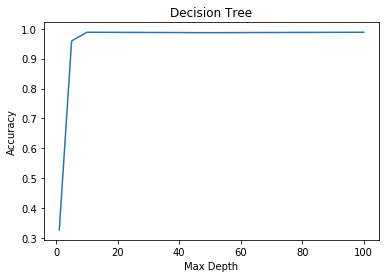

100


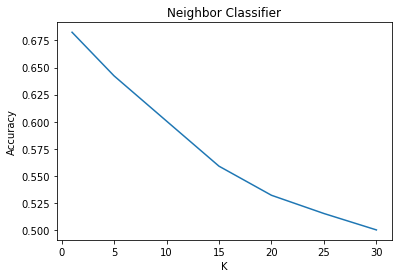

1


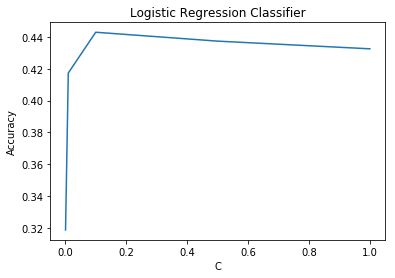

0.1


In [106]:
Y = final['Difference']
X = final.drop('Difference',axis=1)

import numpy as np 
from sklearn import tree
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import linear_model 
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline

maxdepths = [1,5,10,50,100]
accuracy = []
for param in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=param)
    scores = cross_val_score(clf, X, Y, cv=5)
    accuracy.append(scores.mean())

plt.plot(maxdepths, accuracy)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree')
plt.show()

best1 = 0
for i in accuracy:
    if i >= best1:
        best1 = i 
depth1 = maxdepths[accuracy.index(best1)]
print(depth1)

Ks = [1, 5, 10, 15, 20, 25, 30]
accuracyK = []
for k in Ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X, Y, cv=5)
    accuracyK.append(scores.mean())

plt.plot(Ks, accuracyK)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Neighbor Classifier')
plt.show()

best2 = 0
for i in accuracyK:
    if i >= best2:
        best2 = i
depth2 = Ks[accuracyK.index(best2)]
print(depth2)

maxdepths = [0.001, 0.01, 0.1, 0.5, 1]
accuracy = []
for c in maxdepths:
    clf = linear_model.LogisticRegression(C=c)
    scores = cross_val_score(clf, X, Y, cv=5)
    accuracy.append(scores.mean())

plt.plot(maxdepths, accuracy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Classifier')
plt.show()

best3 = 0
for i in accuracy:
    if i >= best3:
        best3 = i 
depth3 = maxdepths[accuracy.index(best3)]

print(depth3)

In [107]:
from sklearn.metrics import accuracy_score

Y_test = Test['Difference']
X_test = Test.drop('Difference',axis=1)

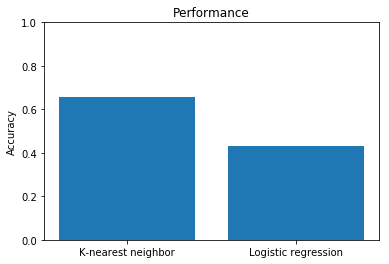

[0.655, 0.43]

In [116]:
sc=[]
clf = KNeighborsClassifier(n_neighbors=depth2)
clf.fit(X, Y)
Y_predTest2 = clf.predict(X_test)
sc.append(accuracy_score(Y_test, Y_predTest2))

clf = linear_model.LogisticRegression(C=1)
clf.fit(X, Y)
Y_predTest3 = clf.predict(X_test)
sc.append(accuracy_score(Y_test, Y_predTest3))

objects = ( 'K-nearest neighbor', 'Logistic regression')
y_pos = np.arange(len(objects))

plt.bar(y_pos, sc)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Performance')
plt.ylim(0,1)

plt.show()

sc